# Problem Statement

## An Ad- Agency analyzed a dataset of online ads and used a machine learning model to predict whether a user would click on an ad or not.

In [2]:
#Loading requiered libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', 0)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format
import math
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import random
import gzip
import category_encoders as ce
pd.options.display.float_format = '{:.2f}'.format


In [3]:
#load data
df = pd.read_csv("../click-through-rate-pred/train.csv",nrows=5000000)

In [7]:
df.shape

(5000000, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 915.5+ MB


In [9]:
#converting to datetime
df['hour'] = df['hour'].astype(str)
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
df['hour'] = df['hour'].apply(parse_date)

In [10]:
# hour column contains event date with all the details, extracting the same to create different columns.
df['year'] = df['hour'].dt.year
df['month'] = df['hour'].dt.month
df['day'] = df['hour'].dt.day
df['dayofweek'] = df['hour'].dt.dayofweek
df['hour_time'] = df['hour'].dt.hour
df.head(2)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,dayofweek,hour_time
0,1000009418151094272.00,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79,2014,10,21,1,0
1,10000169349117863936.00,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79,2014,10,21,1,0


In [11]:
#dropping `hour` column
df.drop('hour',axis=1,inplace=True)

In [12]:
#dropping `id` column since it has unique values
df.drop('id',axis=1,inplace=True)

In [13]:
# checking the sum of the null values across all cloumns and rows.
df.isnull().sum().sum()

0

In [14]:
df.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,dayofweek,hour_time
count,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00,5000000.00
mean,0.17,1005.00,0.26,1.03,0.22,18456.80,319.58,58.90,2073.87,1.66,197.35,49006.12,78.15,2014.00,10.00,21.18,1.18,8.94
std,0.38,1.09,0.47,0.54,0.68,4660.72,27.44,45.55,568.13,1.36,320.02,50044.04,62.50,0.00,0.00,0.38,0.38,6.28
min,0.00,1001.00,0.00,0.00,0.00,375.00,120.00,20.00,112.00,0.00,33.00,-1.00,13.00,2014.00,10.00,21.00,1.00,0.00
25%,0.00,1005.00,0.00,1.00,0.00,17017.00,320.00,50.00,1872.00,0.00,35.00,-1.00,32.00,2014.00,10.00,21.00,1.00,4.00
50%,0.00,1005.00,0.00,1.00,0.00,19950.00,320.00,50.00,2229.00,2.00,39.00,-1.00,61.00,2014.00,10.00,21.00,1.00,7.00
75%,0.00,1005.00,1.00,1.00,0.00,21665.00,320.00,50.00,2493.00,3.00,169.00,100084.00,95.00,2014.00,10.00,21.00,1.00,14.00
max,1.00,1012.00,7.00,5.00,5.00,21822.00,1024.00,1024.00,2520.00,3.00,1835.00,100248.00,221.00,2014.00,10.00,22.00,2.00,23.00


In [16]:
#checking duplicate rows
df.duplicated().sum()

1368527

In [18]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(3631473, 27)

In [20]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [21]:
df_num = df[num_col]
df_cat = df[cat_col]

In [ ]:
sns.distplot(x=df['id'], color='indianred')

In [ ]:
sns.distplot(x=df['month'], color='indianred')

In [ ]:
sns.distplot(x=df['C1'], color='indianred')

In [ ]:
sns.distplot(x=df['banner_pos'], color='indianred')

In [ ]:
sns.distplot(x=df['device_type'], color='indianred')

In [ ]:
sns.distplot(x=df['device_conn_type'], color='indianred')

In [ ]:
sns.distplot(x=df['15'], color='indianred')

In [ ]:
sns.distplot(x=df['16'], color='indianred')

In [ ]:
sns.distplot(x=df['17'], color='indianred')

In [ ]:
sns.distplot(x=df['18'], color='indianred')

In [ ]:
sns.distplot(x=df['19'], color='indianred')

In [ ]:
sns.distplot(x=df['20'], color='indianred')

In [ ]:
sns.distplot(x=df['21'], color='indianred')

In [ ]:
sns.distplot(x=df['month'], color='indianred')

In [ ]:
sns.distplot(x=df['year'], color='indianred')

In [ ]:
sns.distplot(x=df['day'], color='indianred')

In [ ]:
sns.distplot(x=df['dayofweek'], color='indianred')

In [ ]:
sns.distplot(x=df['hour_time'], color='indianred')

- month column has only 1 data entry, no exrtra information is added, can be dropped
- banner pos, device conn, C20, C15, C16 looks like data is cenetered around certain values.

Text(0.5, 1.0, 'Pearson correlation of Features')

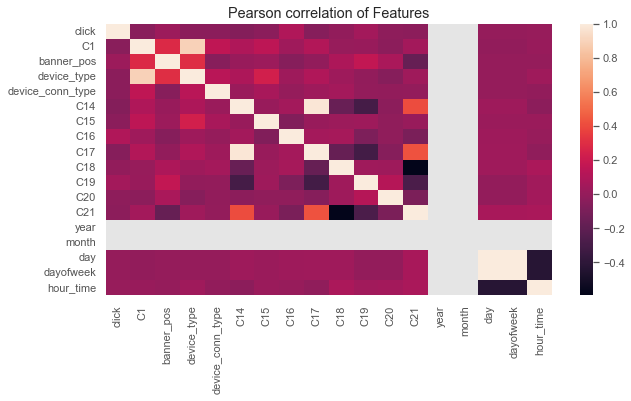

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.title("Pearson correlation of Features")

- `year` and `month` has got no significance, better to drop it.
- `click` is target column
- `C14` and `C17` are highly co-related, later will remove one of them after the base model.
- `device_type` and `C1` are highly co-related, later will remove one of them after the base model.

In [23]:
df['C20'].value_counts()

-1         1939657
 100084     282563
 100077     132300
 100083     125571
 100075     122461
            ...   
 100157          3
 100100          3
 100209          2
 100134          2
 100027          1
Name: C20, Length: 168, dtype: int64

- Removing C20 anomalised column, since it have got nearly 47% of values with -1. As a categorical variable it's not expected to have values as -1.

In [25]:
df.drop(columns =['year','month','C20'],axis=1,inplace=True)

- All categorical variables have lot of unique values in it, one hot encoding is not a scalable approach.
- we will go with label encoding and scaling approach is a better idea for this.

In [26]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

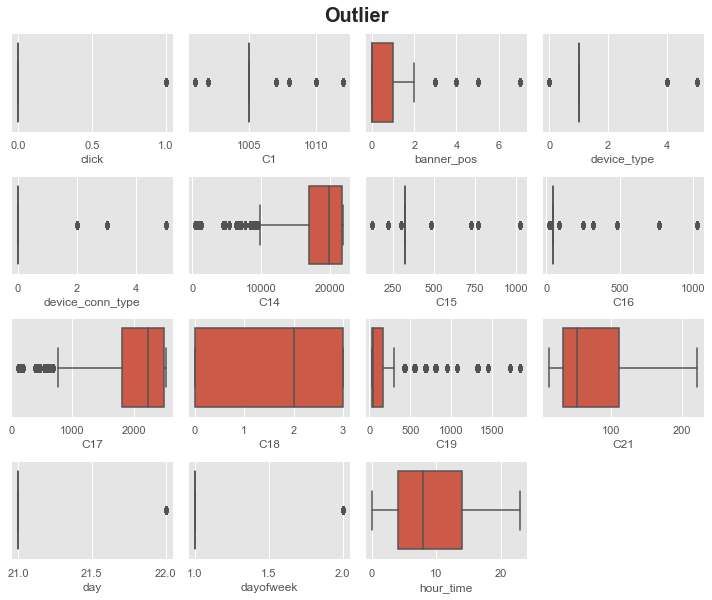

In [27]:
#checking outliers
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [31]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [32]:
for columns in num_col[1:]:
    handling_outliers(df,columns)

C1 --- IQR ---> 0.0
Lower Fence: 1005.0
Higher Fence: 1005.0
______________________________________________
banner_pos --- IQR ---> 1.0
Lower Fence: -1.5
Higher Fence: 2.5
______________________________________________
device_type --- IQR ---> 0.0
Lower Fence: 1.0
Higher Fence: 1.0
______________________________________________
device_conn_type --- IQR ---> 0.0
Lower Fence: 0.0
Higher Fence: 0.0
______________________________________________
C14 --- IQR ---> 4808.0
Lower Fence: 9646.0
Higher Fence: 28878.0
______________________________________________
C15 --- IQR ---> 0.0
Lower Fence: 320.0
Higher Fence: 320.0
______________________________________________
C16 --- IQR ---> 0.0
Lower Fence: 50.0
Higher Fence: 50.0
______________________________________________
C17 --- IQR ---> 694.0
Lower Fence: 759.0
Higher Fence: 3535.0
______________________________________________
C18 --- IQR ---> 3.0
Lower Fence: -4.5
Higher Fence: 7.5
______________________________________________
C19 --- IQR ---

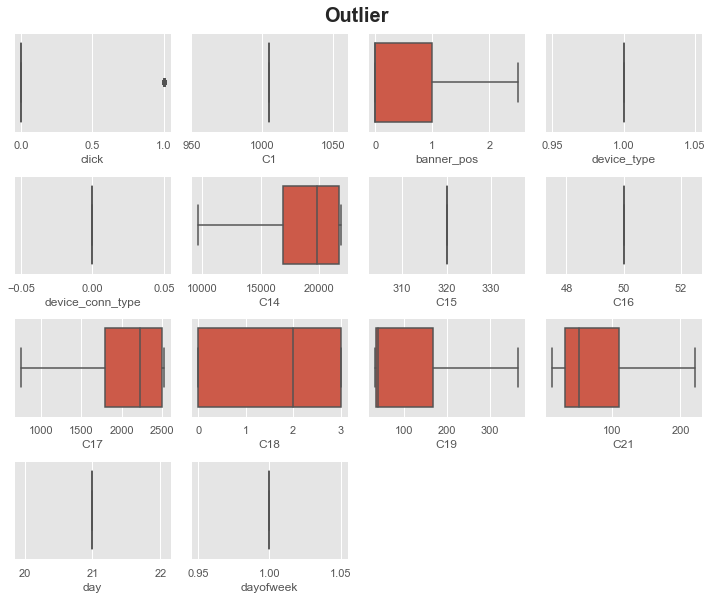

In [33]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col[1:])):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

- `click` is target column due to class imbalance it shows outlier

In [34]:
#Target column analysis
df['click'].value_counts()

0    2860023
1     771450
Name: click, dtype: int64

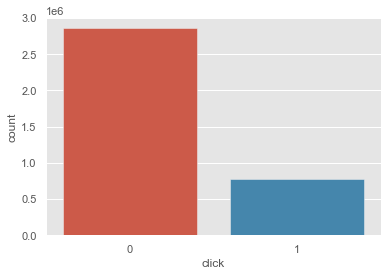

In [35]:
plt.figure()
sns.countplot(x='click', data=df)
plt.show()

In [6]:
(df['click'].value_counts()[0]/df.shape[0])*100

82.61988

- 82.5% values are 0 and 17.5% values are 1. Data is highly imbalance.

In [24]:
#checcking unique values
table = []
for col in df_cat.columns:
    unique_values = df_cat[col].nunique()
    
    # Append the results to the table
    table.append([col, unique_values])

# Create a DataFrame from the table
table_df = pd.DataFrame(table, columns=['Column', 'Unique Values'])

#sort table on the basis of missing values
sorted_table_df=table_df.sort_values(by='Unique Values', ascending=False)

# Print the table
sorted_table_df

,Column,Unique Values
7,device_ip,1275581
6,device_id,441691
8,device_model,6306
3,app_id,4461
1,site_domain,3668
0,site_id,3034
4,app_domain,310
5,app_category,31
2,site_category,22


- All categorical variables have lot of unique values in it, one hot encoding is not a scalable approach. 
- we will go with label encoding and scaling approach is a better idea for this.

In [38]:
# dataset is huge and running multiple algo will take time and resources might exhaust, 
# hence taking only 10% of the data for analysis.

sampled_data = df.sample(frac=0.1, random_state=42)
X = sampled_data.drop(['click'], axis=1)
y = sampled_data['click']

In [41]:
#Encoding
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
3705539,1005,1.00,0.31,0.31,0.24,0.23,0.23,0.23,0.22,0.21,0.24,1,0,17264,320,50,1872,3.00,39,23.00,21,1,19
76267,1005,0.00,0.23,0.23,0.22,0.23,0.23,0.23,0.22,0.21,0.27,1,0,15703,320,50,1722,0.00,35,79.00,21,1,0


In [42]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)

# Building basic models [no feature engineering]
 1. in this no feature engineering is done apart from removing definate columns click and month.
 2. We will run 3 models 
      a. Logistic regression [for explainability and finding linear relationship]
      b. Decision tree classifier [for explainability and also for non-linear relation]
      c. Random forest classifier [for accuracy and improving the model] 
 3. Target variable is highly imbalance, so model will be baised towards majority class. for every base model will try with both balance and imbalance data.

In [43]:
# this function helps in evaluation the given model and provide accuracy and confusion matrix. 

def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print(cnf_matrix)
    #metrics.plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    return accuracy, cnf_matrix

In [44]:
# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 

def draw_roc(model, Xtest, actual):
    probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [45]:
# Returns the ctossvalidation score for given number of n folds. 

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [46]:
# this stores the results in dataframe for evaluating the final result. 

def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

## Dummy classifier for verification
Dummy classifier helps in baseling the model performace w.r.t dominanat class. 

In [47]:
outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
outcome = outcome.append(temp)
outcome

0.7871849946105853
[[200104      0]
 [ 54098      0]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79


## Basic regression model with imbalance precidtor 

In [48]:
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
1213255,1005,0.00,0.40,0.40,0.22,0.23,0.23,0.23,0.22,0.30,0.23,1,0,16615,320,50,1863,3.00,39,23.00,21,1,6
2291281,1005,0.00,0.34,0.53,0.18,0.23,0.23,0.23,0.21,0.21,0.10,1,0,19665,320,50,2253,2.00,303,52.00,21,1,11
1019078,1005,1.00,0.07,0.07,0.14,0.23,0.23,0.23,0.22,0.21,0.26,1,0,9646,320,50,761,3.00,175,23.00,21,1,5
2005466,1005,0.00,0.47,0.47,0.32,0.23,0.23,0.23,0.22,0.21,0.16,1,0,20093,320,50,2295,2.00,35,23.00,21,1,9
3511478,1005,1.00,0.17,0.17,0.18,0.20,0.23,0.17,0.21,0.21,0.15,1,0,21790,320,50,2513,3.00,35,68.00,21,1,18


In [49]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
1213255,0.00,0.00,0.40,0.40,0.69,0.24,0.25,0.55,0.23,0.30,0.25,0.00,0.00,0.57,0.00,0.00,0.63,1.00,0.02,0.05,0.00,0.00,0.26
2291281,0.00,0.00,0.34,0.53,0.55,0.24,0.25,0.55,0.22,0.22,0.11,0.00,0.00,0.82,0.00,0.00,0.85,0.67,0.81,0.19,0.00,0.00,0.48
1019078,0.00,0.40,0.07,0.07,0.45,0.24,0.25,0.55,0.23,0.22,0.28,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.43,0.05,0.00,0.00,0.22
2005466,0.00,0.00,0.48,0.47,1.00,0.24,0.25,0.55,0.23,0.22,0.17,0.00,0.00,0.86,0.00,0.00,0.87,0.67,0.01,0.05,0.00,0.00,0.39
3511478,0.00,0.40,0.17,0.17,0.55,0.20,0.25,0.39,0.22,0.22,0.17,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.01,0.26,0.00,0.00,0.78


In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
3414330,0.00,0.00,0.59,0.59,0.33,0.24,0.25,0.55,0.23,0.22,0.30,0.00,0.00,0.77,0.00,0.00,0.80,0.67,0.02,0.10,0.00,0.00,0.74
271095,0.00,0.00,0.17,0.17,0.55,0.00,0.20,0.39,0.23,0.06,0.25,0.00,0.00,0.99,0.00,0.00,0.98,0.33,1.00,0.18,0.00,0.00,0.09


In [52]:
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("logistic regres - imbalance predict", y_train, X_train, y_test, X_test, model, 5)
outcome = outcome.append(temp)
outcome

0.8093625223736748
[[82178  3582]
 [17187  5998]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81


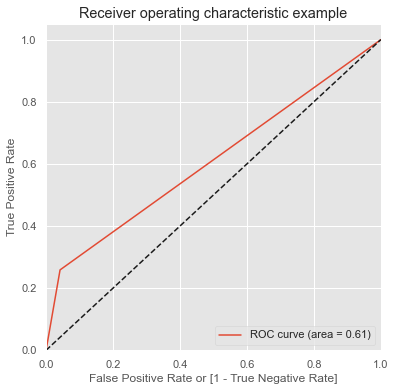

(array([0.        , 0.04176772, 1.        ]),
 array([0.        , 0.25870175, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [53]:
draw_roc(model, X_test, y_test)

- Logistic regression is behaving almost same as dummy classifier.
- ROC_AUC isn't doing better at all

## Basic regression model with balance predictor 

Original dataset shape  Counter({0: 285864, 1: 77283})
Resampled dataset shape Counter({0: 285864, 1: 285864})


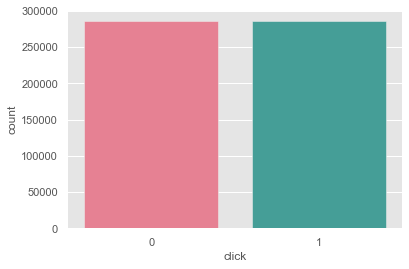

In [54]:
# x_new and y_new we will use for balanced data set for all modules
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new, palette='husl')
plt.show()

In [55]:
x_new.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
0,1005,1.00,0.31,0.31,0.24,0.23,0.23,0.23,0.22,0.21,0.24,1,0,17264,320,50,1872,3.00,39,23.00,21,1,19
1,1005,0.00,0.23,0.23,0.22,0.23,0.23,0.23,0.22,0.21,0.27,1,0,15703,320,50,1722,0.00,35,79.00,21,1,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

In [57]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
294913,0.00,0.00,0.17,0.17,0.55,0.11,0.20,0.39,0.23,0.22,0.13,0.00,0.00,0.83,0.00,0.00,0.85,1.00,1.00,0.23,0.00,0.00,0.09
499819,0.00,0.40,0.31,0.31,0.73,0.24,0.25,0.55,0.23,0.51,0.34,0.00,0.00,0.88,0.00,0.00,0.89,0.00,0.02,0.69,0.00,0.00,0.17


In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

0.7093674753234336
[[63892 21868]
 [27981 57778]]


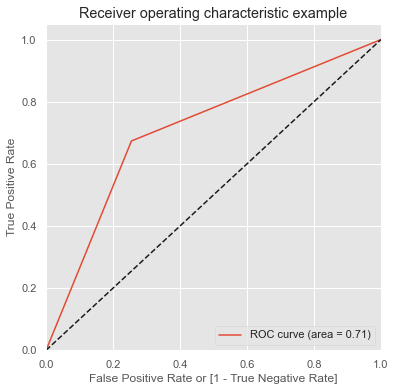

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71


In [59]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("logistic regres - balance predict", y_train, X_train, y_test, X_test, model, 5)
draw_roc(model, X_test, y_test)
outcome = outcome.append(temp)
outcome

##  Decision tree classifier with unbalanced data 

In [60]:
# decision tree doesn't require feature scaling, will use the raw features directly 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
1213255,1005,0.00,0.40,0.40,0.22,0.23,0.23,0.23,0.22,0.30,0.23,1,0,16615,320,50,1863,3.00,39,23.00,21,1,6
2291281,1005,0.00,0.34,0.53,0.18,0.23,0.23,0.23,0.21,0.21,0.10,1,0,19665,320,50,2253,2.00,303,52.00,21,1,11


0.7452567809445133
[[72612 13148]
 [14605  8580]]


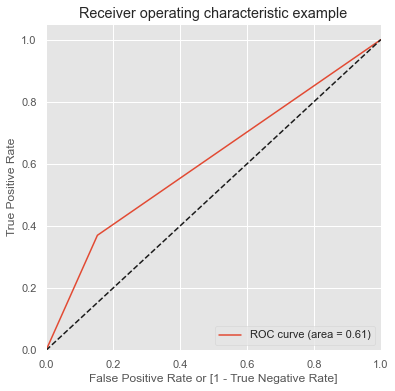

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
0,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74


In [61]:
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("decision tree basic - imbalance predict", y_train, X_train, y_test, X_test, dt_basic, 5)
draw_roc(dt_basic, X_test, y_test)
outcome = outcome.append(temp)
outcome


##  Decision tree classifier with balanced data 


In [62]:
# x_new and y_new are already calculated before for balanced dataset using the same.

X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
294913,1005,0.00,0.17,0.17,0.18,0.11,0.18,0.17,0.22,0.21,0.12,1,0,19743,320,50,2264,3.00,365,61.00,21,1,2
499819,1005,1.00,0.31,0.31,0.24,0.23,0.23,0.23,0.22,0.50,0.31,1,0,20359,320,50,2333,0.00,39,157.00,21,1,4


0.8485532215089874
[[66885 18875]
 [ 7101 78658]]


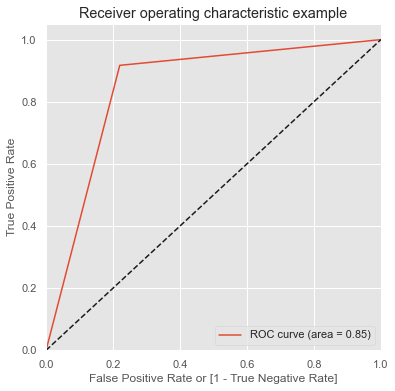

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
0,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74
0,decision tree basic - balance predict,0.85,0.81,0.92,0.85,0.81,0.92,0.83,0.83,0.83,0.83,0.83,0.83


In [63]:
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("decision tree basic - balance predict", y_train, X_train, y_test, X_test, dt_basic, 5)
draw_roc(dt_basic, X_test, y_test)
outcome = outcome.append(temp)
outcome

### observation 
1. decision tree on unbalanced data isn't doing that great.
1. decision tree on balanced data is really doing very good. 
2. decision tree on balanced data on test data as well as cross validation is doing really well.
4. ROC_AUC curve looks really good.

## Random forest classifier with imbalanced data 


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
1213255,1005,0.00,0.40,0.40,0.22,0.23,0.23,0.23,0.22,0.30,0.23,1,0,16615,320,50,1863,3.00,39,23.00,21,1,6
2291281,1005,0.00,0.34,0.53,0.18,0.23,0.23,0.23,0.21,0.21,0.10,1,0,19665,320,50,2253,2.00,303,52.00,21,1,11


0.7809445132865207
[[77481  8279]
 [15586  7599]]


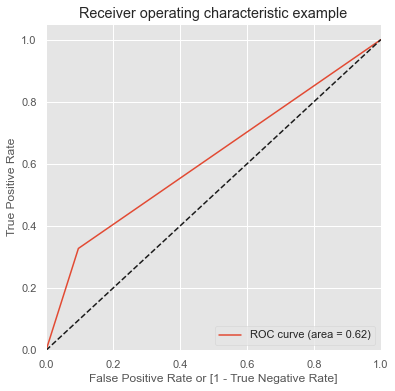

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
0,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74
0,decision tree basic - balance predict,0.85,0.81,0.92,0.85,0.81,0.92,0.83,0.83,0.83,0.83,0.83,0.83
0,Random forest basic - imbalance predict,0.78,0.48,0.33,0.78,0.48,0.33,0.78,0.78,0.78,0.78,0.78,0.78


In [65]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - imbalance predict", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome


## Random forest classifier with balanced data 


In [66]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
294913,1005,0.00,0.17,0.17,0.18,0.11,0.18,0.17,0.22,0.21,0.12,1,0,19743,320,50,2264,3.00,365,61.00,21,1,2
499819,1005,1.00,0.31,0.31,0.24,0.23,0.23,0.23,0.22,0.50,0.31,1,0,20359,320,50,2333,0.00,39,157.00,21,1,4


0.860581043499554
[[67742 18018]
 [ 5895 79864]]


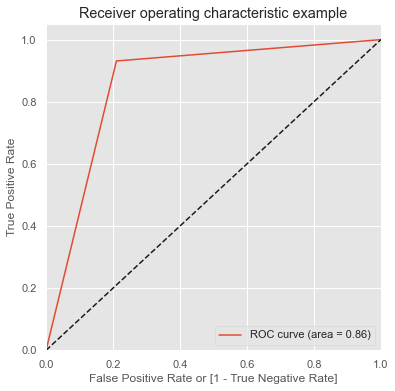

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
0,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74
0,decision tree basic - balance predict,0.85,0.81,0.92,0.85,0.81,0.92,0.83,0.83,0.83,0.83,0.83,0.83
0,Random forest basic - imbalance predict,0.78,0.48,0.33,0.78,0.48,0.33,0.78,0.78,0.78,0.78,0.78,0.78
0,Random forest basic - balance predict,0.86,0.82,0.93,0.86,0.82,0.93,0.84,0.84,0.84,0.84,0.84,0.84


In [67]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - balance predict", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome

### observarion :
 1. Random forest data with imbalance data is over fitted for training data.
 1. Random forest with balanced data set is performing the best so far on both train and test data.
 2. Random forest with balanced data holding good for cross validation as well.
 Conclusion based on simple models built  :- Random forest on balanced data set is the best model built


# Building basic models [with feature engineering]
 in this will follow on building same models as before.
 1. Logistic regression.
 2. Decision tree classifier.
 3. Random forest Classifier.
 One Important observation : While building, we observed that building with balanced predictor is a better apporach. hence all the 3 models in feature engineering case will be built using balanced data set only. 

In [68]:
data_feature = sampled_data.copy()

Text(0.5, 1.05, 'Pearson correlation of Features')

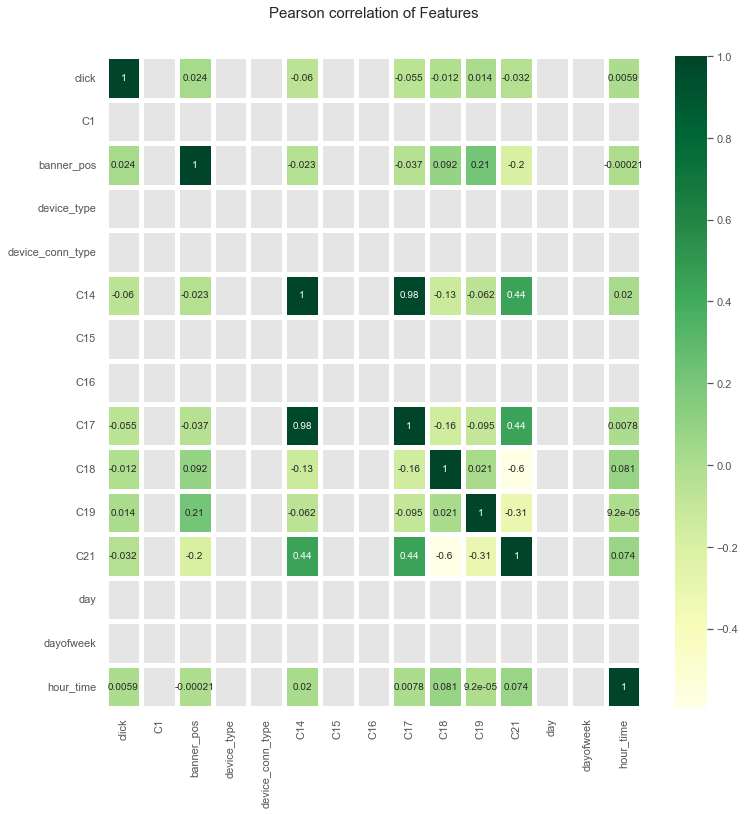

In [69]:
corr = data_feature.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax, annot=True, linewidths=5,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)


In [70]:
# since C1 is anomalised column we can drop it.
# C14 and C17 are highly co-related, dropping either is a good idea.

data_feature.drop(['C14', 'C1'], axis=1, inplace= True)

In [90]:
X = data_feature.drop(['click'], axis=1)
y = data_feature['click']

In [91]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
3705539,1.00,0.31,0.31,0.24,0.23,0.23,0.23,0.22,0.21,0.24,1,0,320,50,1872,3.00,39,23.00,21,1,19
76267,0.00,0.23,0.23,0.22,0.23,0.23,0.23,0.22,0.21,0.27,1,0,320,50,1722,0.00,35,79.00,21,1,0


Original dataset shape  Counter({0: 285864, 1: 77283})
Resampled dataset shape Counter({0: 285864, 1: 285864})


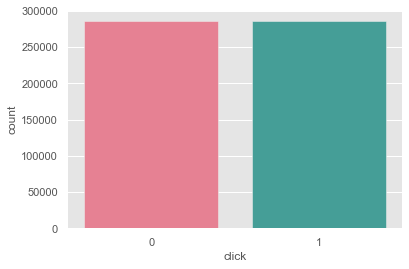

In [92]:
# As discussed at the start, we will use balanced data for all the 
# x_new and y_new we will use for balanced data set for all modules
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new, palette='husl')
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

## Logistic regression model with feature engineering and balance precidtor.

In [94]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
294913,0.00,0.17,0.17,0.55,0.11,0.20,0.39,0.23,0.22,0.13,0.00,0.00,0.00,0.00,0.85,1.00,1.00,0.23,0.00,0.00,0.09
499819,0.00,0.48,0.47,1.00,0.24,0.25,0.55,0.23,0.22,0.31,0.00,0.00,0.00,0.00,0.70,0.67,0.02,0.10,0.00,0.00,0.61
505976,0.00,0.17,0.17,0.55,0.28,0.19,0.39,0.23,0.43,0.25,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.01,0.00,0.00,0.74
254019,0.40,0.15,0.16,0.73,0.24,0.25,0.55,0.23,0.22,0.21,0.00,0.00,0.00,0.00,0.59,1.00,0.40,0.05,0.00,0.00,0.83
220064,0.00,0.17,0.17,0.55,0.28,0.30,0.42,0.22,0.43,0.20,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.01,0.00,0.00,0.96


In [95]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:               400209
Model:                            GLM   Df Residuals:                   400193
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1787e+05
Date:                Wed, 31 May 2023   Deviance:                   4.3574e+05
Time:                        13:02:38   Pearson chi2:                 4.22e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2573
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4096      0.045    -97.906      0.000      -4.498      -4.321
banner_pos           0.1034      0.024      4.377      0.000       0.057       0.150
site_id              2.7318      0.099     27.640      0.000       2.538       2.925
site_domain          2.7410      0.104     26.414      0.000       2.538       2.944
site_category        0.0329      0.036      0.908      0.364      -0.038       0.104
app_id               6.9708      0.090     77.542      0.000       6.795       7.147
app_domain          -1.9032      0.144    -13.241      0.000      -2.185      -1.621
app_category        -2.6524      0.075    -35.507      0.000      -2.799      -2.506
device_id            4.6002      0.116     39.794      0.000       4.374       4.827
device_ip            7.4189      0.041    180.170      0.000       7.338       7.500
device_model         2.9216      0.054     54.519      0.000       2.817       3.027
device_type       3.939e-15   5.12e-17     76.944      0.000    3.84e-15    4.04e-15
device_conn_type -1.824e-16   6.18e-17     -2.949      0.003   -3.04e-16   -6.12e-17
C15               -3.68e-16    4.5e-17     -8.177      0.000   -4.56e-16    -2.8e-16
C16               8.331e-17    1.6e-17      5.194      0.000    5.19e-17    1.15e-16
C17                 -0.2953      0.015    -20.059      0.000      -0.324      -0.266
C18                 -0.0858      0.012     -7.262      0.000      -0.109      -0.063
C19                  0.1159      0.011     10.660      0.000       0.095       0.137
C21                 -0.0523      0.018     -2.957      0.003      -0.087      -0.018
day                       0          0        nan        nan           0           0
dayofweek                 0          0        nan        nan           0           0
hour_time            0.0079      0.014      0.576      0.565      -0.019       0.035
====================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[148802  51302]
 [ 65875 134230]]
0.7072104825228818


In [97]:
def sm_model_evaluation (model, x_test, y_test):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [98]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
sm_model_evaluation(res, X_test, y_test)  

0.7085337484476938
[[63873 21887]
 [28105 57654]]


In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,107.15
2,site_id,7.90
3,site_domain,7.81
18,C21,2.48
7,app_category,2.30
6,app_domain,2.02
16,C18,1.99
4,site_category,1.71
5,app_id,1.40
15,C17,1.38


In [100]:
# VIF looks good, w.r.t P values hour_time,day have got highest, will remove and build the model.

X_train_sm.drop(['hour_time','day'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:               400209
Model:                            GLM   Df Residuals:                   400194
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1787e+05
Date:                Wed, 31 May 2023   Deviance:                   4.3574e+05
Time:                        13:03:01   Pearson chi2:                 4.22e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2573
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4071      0.045    -98.287      0.000      -4.495      -4.319
banner_pos           0.1037      0.024      4.394      0.000       0.057       0.150
site_id              2.7303      0.099     27.634      0.000       2.537       2.924
site_domain          2.7431      0.104     26.449      0.000       2.540       2.946
site_category        0.0333      0.036      0.921      0.357      -0.038       0.104
app_id               6.9725      0.090     77.601      0.000       6.796       7.149
app_domain          -1.9010      0.144    -13.229      0.000      -2.183      -1.619
app_category        -2.6557      0.074    -35.658      0.000      -2.802      -2.510
device_id            4.6007      0.116     39.801      0.000       4.374       4.827
device_ip            7.4188      0.041    180.170      0.000       7.338       7.499
device_model         2.9214      0.054     54.517      0.000       2.816       3.026
device_type       -3.85e-15   2.17e-16    -17.730      0.000   -4.28e-15   -3.42e-15
device_conn_type   6.28e-15    3.1e-16     20.284      0.000    5.67e-15    6.89e-15
C15               1.151e-15   5.82e-17     19.764      0.000    1.04e-15    1.26e-15
C16                       0          0        nan        nan           0           0
C17                 -0.2957      0.015    -20.108      0.000      -0.325      -0.267
C18                 -0.0846      0.012     -7.270      0.000      -0.107      -0.062
C19                  0.1163      0.011     10.713      0.000       0.095       0.138
C21                 -0.0505      0.017     -2.901      0.004      -0.085      -0.016
dayofweek                 0          0        nan        nan           0           0
====================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.85
2,site_id,7.90
3,site_domain,7.80
18,C21,2.41
7,app_category,2.29
6,app_domain,2.02
16,C18,1.94
4,site_category,1.71
5,app_id,1.40
15,C17,1.38


In [102]:
X_train_sm.drop(['dayofweek','device_ip', 'C15'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:               400209
Model:                            GLM   Df Residuals:                   400195
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4270e+05
Date:                Wed, 31 May 2023   Deviance:                   4.8541e+05
Time:                        13:03:58   Pearson chi2:                 4.33e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1592
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.5096      0.044    -80.556      0.000      -3.595      -3.424
banner_pos           0.1184      0.022      5.310      0.000       0.075       0.162
site_id              2.7135      0.099     27.392      0.000       2.519       2.908
site_domain          3.2099      0.104     30.967      0.000       3.007       3.413
site_category       -0.0605      0.034     -1.762      0.078      -0.128       0.007
app_id               7.6332      0.087     87.540      0.000       7.462       7.804
app_domain          -1.5903      0.137    -11.595      0.000      -1.859      -1.321
app_category        -2.8146      0.071    -39.769      0.000      -2.953      -2.676
device_id            7.3106      0.120     60.862      0.000       7.075       7.546
device_model         3.4195      0.051     66.861      0.000       3.319       3.520
device_type       2.694e-16   1.23e-17     21.899      0.000    2.45e-16    2.93e-16
device_conn_type -9.028e-16   1.82e-17    -49.488      0.000   -9.39e-16   -8.67e-16
C16               1.746e-15   3.67e-17     47.592      0.000    1.67e-15    1.82e-15
C17                 -0.2862      0.014    -20.468      0.000      -0.314      -0.259
C18                 -0.1441      0.011    -13.208      0.000      -0.165      -0.123
C19                  0.0633      0.010      6.166      0.000       0.043       0.083
C21                  0.0268      0.016      1.653      0.098      -0.005       0.059
====================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.44
2,site_id,7.87
3,site_domain,7.71
16,C21,2.41
7,app_category,2.29
6,app_domain,2.02
14,C18,1.94
4,site_category,1.71
5,app_id,1.39
13,C17,1.38


### Model P values and VIF looks good, will find the best threshold for classification.

In [104]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[129147  70957]
 [ 66294 133811]]
0.6570516904917181


In [105]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(res, X_test[col], y_test)  

0.6598860767611752
[[55735 30025]
 [28311 57448]]


In [106]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
294913,0,0.21,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499819,1,0.82,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
505976,1,0.66,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
254019,0,0.34,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
220064,1,0.54,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [107]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.50,0.50,1.00
0.05,0.05,0.50,0.50,1.00
0.10,0.10,0.51,0.51,1.00
0.15,0.15,0.54,0.52,1.00
0.20,0.20,0.56,0.53,0.99
0.25,0.25,0.59,0.55,0.97
0.30,0.30,0.62,0.57,0.95
0.35,0.35,0.64,0.59,0.91
0.40,0.40,0.65,0.61,0.86
0.45,0.45,0.66,0.63,0.78


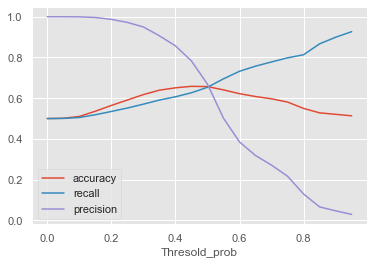

In [108]:
cutoff_df.plot.line(x='Thresold_prob', y=['accuracy','recall','precision'])
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
294913,0,0.21,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499819,1,0.82,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
505976,1,0.66,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
254019,0,0.34,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
220064,1,0.54,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1


In [110]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns]
print(X_train_sm.shape)
print(X_test.shape)

(400209, 16)
(171519, 16)


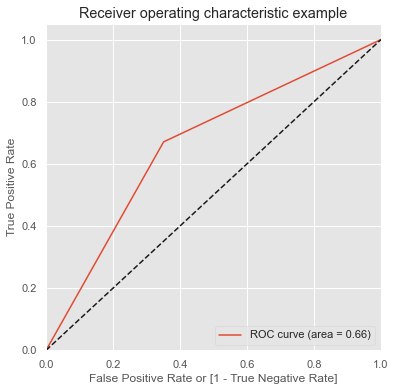

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
0,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74
0,decision tree basic - balance predict,0.85,0.81,0.92,0.85,0.81,0.92,0.83,0.83,0.83,0.83,0.83,0.83
0,Random forest basic - imbalance predict,0.78,0.48,0.33,0.78,0.48,0.33,0.78,0.78,0.78,0.78,0.78,0.78
0,Random forest basic - balance predict,0.86,0.82,0.93,0.86,0.82,0.93,0.84,0.84,0.84,0.84,0.84,0.84
0,logistic reg with feature engine,0.66,0.66,0.67,0.66,0.66,0.67,0.66,0.66,0.66,0.66,0.66,0.66


In [111]:
model = LogisticRegression()
model.fit(X_train_sm, y_train)
accuracy, cnf_matrix = model_eval(model, X_test[X_train_sm.columns], y_test)
temp = store_results("logistic reg with feature engine", y_train, X_train_sm, y_test, X_test[X_train_sm.columns], \
                     model, 5)
draw_roc(model, X_test[X_train_sm.columns], y_test)
outcome = outcome.append(temp)
outcome


## Decision tree model with feature engineering and balance precidtor.


In [112]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
294913,0.00,0.17,0.17,0.18,0.11,0.18,0.17,0.22,0.21,0.12,1,0,320,50,2264,3.00,365,61.00,21,1,2
499819,0.00,0.47,0.47,0.32,0.23,0.23,0.23,0.22,0.21,0.28,1,0,320,50,1994,2.00,39,33.00,21,1,14


In [113]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train, y_train)
feature_importances = dt_tree.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
8,device_ip,0.30
9,device_model,0.22
20,hour_time,0.18
1,site_id,0.11
4,app_id,0.05
14,C17,0.03
2,site_domain,0.02
17,C21,0.02
7,device_id,0.02
16,C19,0.02


In [114]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

In [115]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

['site_id', 'site_domain', 'app_id', 'device_ip', 'device_model', 'C17', 'C21', 'hour_time']
8
Train results
accuracy 0.9308261433401048
cnf_matrix 
 [[182226  17878]
 [  9806 190299]]
Test results
accuracy 0.8291151417627202
cnf_matrix 
 [[65295 20465]
 [ 8845 76914]]


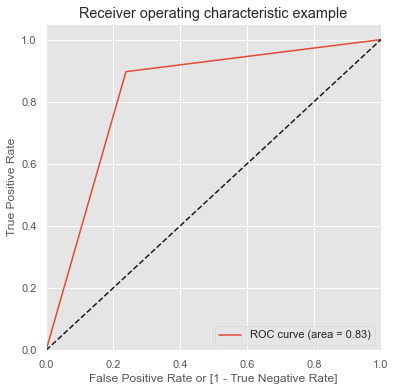

(array([0.        , 0.23863106, 1.        ]),
 array([0.        , 0.89686214, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [116]:
print(rf_cols)
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
print(len(rf_cols))
predict_rf = dt_tree.predict(X_train)
predict_rf_test = dt_tree.predict(X_test)

accuracy, cnf_matrix = model_eval(dt_tree, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

draw_roc(dt_tree, X_test, y_test)


 Above basic tree with right features seems data is overfitting. having the correct hyper parameter tuning help in interpretation and bit of over fitting of the model.

In [117]:
param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,200,20),
    'min_samples_split': range(50, 150, 50)
    
}
n_folds = 5
dtree = DecisionTreeClassifier(random_state= 42)
tree3 = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs =-1,return_train_score=True)
tree3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [118]:
tree3.best_params_

{'max_depth': 14, 'min_samples_leaf': 30, 'min_samples_split': 50}

In [119]:
tree3.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=50,
                       random_state=42)

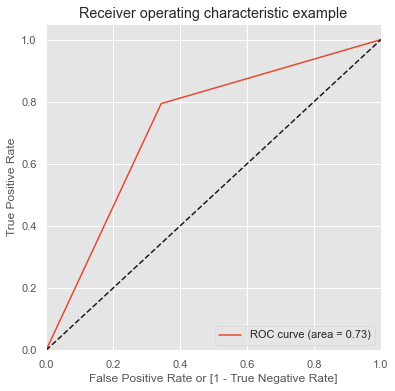

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
0,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
0,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
0,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74
0,decision tree basic - balance predict,0.85,0.81,0.92,0.85,0.81,0.92,0.83,0.83,0.83,0.83,0.83,0.83
0,Random forest basic - imbalance predict,0.78,0.48,0.33,0.78,0.48,0.33,0.78,0.78,0.78,0.78,0.78,0.78
0,Random forest basic - balance predict,0.86,0.82,0.93,0.86,0.82,0.93,0.84,0.84,0.84,0.84,0.84,0.84
0,logistic reg with feature engine,0.66,0.66,0.67,0.66,0.66,0.67,0.66,0.66,0.66,0.66,0.66,0.66
0,Decision tree with feature engine,0.73,0.70,0.79,0.73,0.70,0.79,0.72,0.72,0.72,0.72,0.72,0.72


In [120]:
dt_tree =  DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)
dt_tree.fit(X_train, y_train)
accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
temp = store_results("Decision tree with feature engine", y_train, X_train, y_test, X_test, \
                     dt_tree, 5)
draw_roc(dt_tree, X_test, y_test)
outcome = outcome.append(temp)
outcome

## Random forest model with feature engineering and balance precidtor.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,day,dayofweek,hour_time
294913,0.00,0.17,0.17,0.18,0.11,0.18,0.17,0.22,0.21,0.12,1,0,320,50,2264,3.00,365,61.00,21,1,2
499819,0.00,0.47,0.47,0.32,0.23,0.23,0.23,0.22,0.21,0.28,1,0,320,50,1994,2.00,39,33.00,21,1,14


In [122]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
8,device_ip,0.29
9,device_model,0.27
20,hour_time,0.16
1,site_id,0.07
2,site_domain,0.05
4,app_id,0.05
7,device_id,0.02
14,C17,0.02
17,C21,0.02
16,C19,0.01


using random forest feature importance metric to decide on best features and building the model.

['site_id', 'site_domain', 'app_id', 'device_id', 'device_ip', 'device_model', 'C17', 'hour_time']
8
Train results
accuracy 0.933167420023038
cnf_matrix 
 [[181143  18961]
 [  7786 192319]]
Test results
accuracy 0.8433701222605076
cnf_matrix 
 [[66159 19601]
 [ 7264 78495]]


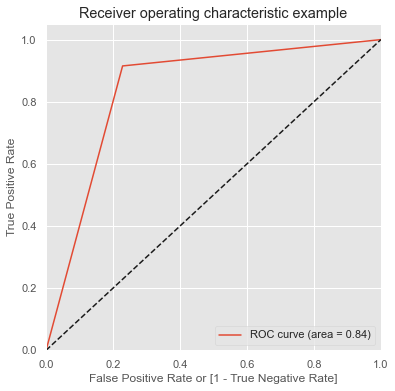

(array([0.        , 0.22855644, 1.        ]),
 array([0.        , 0.91529752, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [123]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)
        
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print(rf_cols)

print(len(rf_cols))
predict_rf = model_rf.predict(X_train)
predict_rf_test = model_rf.predict(X_test)

accuracy, cnf_matrix = model_eval(model_rf, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

draw_roc(model_rf, X_test, y_test)


In [124]:
temp = store_results("Random Forest with feature engine", y_train, X_train, y_test, X_test, \
                     model_rf, 5)
outcome = outcome.append(temp)

In [125]:
outcome.reset_index(drop=True, inplace=True)
outcome

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.79,NaN,0.00,0.79,NaN,0.00,0.79,0.79,0.79,0.79,0.79,0.79
1,logistic regres - imbalance predict,0.81,0.63,0.26,0.81,0.63,0.26,0.81,0.81,0.81,0.81,0.81,0.81
2,logistic regres - balance predict,0.71,0.73,0.67,0.71,0.73,0.67,0.71,0.71,0.71,0.71,0.71,0.71
3,decision tree basic - imbalance predict,0.75,0.39,0.37,0.75,0.39,0.37,0.74,0.74,0.74,0.74,0.74,0.74
4,decision tree basic - balance predict,0.85,0.81,0.92,0.85,0.81,0.92,0.83,0.83,0.83,0.83,0.83,0.83
5,Random forest basic - imbalance predict,0.78,0.48,0.33,0.78,0.48,0.33,0.78,0.78,0.78,0.78,0.78,0.78
6,Random forest basic - balance predict,0.86,0.82,0.93,0.86,0.82,0.93,0.84,0.84,0.84,0.84,0.84,0.84
7,logistic reg with feature engine,0.66,0.66,0.67,0.66,0.66,0.67,0.66,0.66,0.66,0.66,0.66,0.66
8,Decision tree with feature engine,0.73,0.70,0.79,0.73,0.70,0.79,0.72,0.72,0.72,0.72,0.72,0.72
9,Random Forest with feature engine,0.84,0.80,0.92,0.84,0.80,0.92,0.83,0.83,0.83,0.82,0.83,0.83


# conclusion
 If we have to select one model, Random forest classifier with feature enginnering looks promising and best. although after the feature engineering the training and test results looks same as before feature engineering, but model is very robust with new features and rightly fitted for both training and test dataset. 
 Decisiontree  and logistic regression classifer seems to have low accuracy, precision, and recall, overall random forest classifier seems doing better with all aspects.


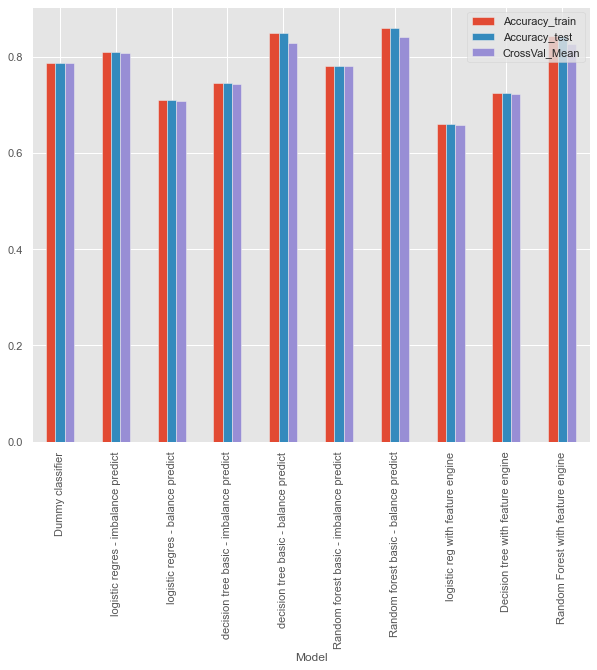

In [126]:
plt.rcParams["figure.figsize"] = (10,8)
outcome.plot(x='Model', y=['Accuracy_train','Accuracy_test','CrossVal_Mean'], kind="bar")
plt.xticks(rotation=90)
plt.show()